In [20]:
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.titlesize'] = 30


## 3.2.2 계단 함수 구현하기

In [35]:
# 계단함수는 입력이 0을 넘으면 1을 출력, 그 외에는 0을 출력

def step_function(x):
    if x > 0:
        return 1
    else :
        return 0

In [36]:
# 인수x는 실수만 받아들임. 넘파이 배열을 인수로 넣을 수는 없음
# 넘파이 배열도 지원하도록 수정해보기

step_function(32323)

1

In [59]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [60]:
# 오류가 남. 넘파이 배열을 넣어야 함
step_function(3)

AttributeError: 'bool' object has no attribute 'astype'

In [62]:
step_function(np.array([3,3,3]))

array([1, 1, 1])

In [48]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [49]:
y = x > 0
y

array([False,  True,  True])

In [44]:
# 넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성
# 우리가 원하는 계단 함수는 0이나 1의 int형을 출력하는 함수
# 그래서 배열 y의 원소를 bool에서 int형으로 바꿔줌
# 이처럼 넘파이 배열의 자료형을 변환할 때는 astype() 메서드를 이용
y.astype(np.int)

array([0, 1, 1])

## 3.2.3 계단 함수의 그래프

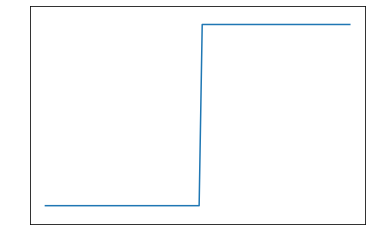

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array( x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

In [54]:
print(np.array( x> 0))
print(np.array( x > 0, dtype = np.int))

[False  True  True]
[0 1 1]


## 3.2.4 시그모이드 함수 구현하기

In [65]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [66]:
# 인수 x가 넘파이 배열이어도 올바른 결과가 나온다는 정보 기억
x = np.array([-1.0,1.0,2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [67]:
t = np.array([1.0,2.0,3.0])
1.0 + t

array([2., 3., 4.])

In [68]:
1.0/t

array([1.        , 0.5       , 0.33333333])

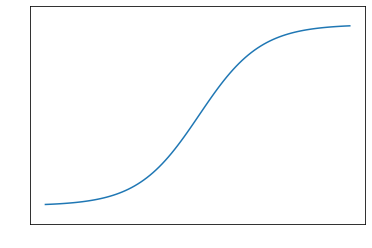

In [71]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

In [72]:
def relu(x):
    return np.maximum(0,x)

# 3.3 다차원 배열의 계산

## 3.3.1 다차원 배열

In [73]:
import numpy as np
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [74]:
np.ndim(A)

1

In [75]:
A.shape

(4,)

In [76]:
A.shape[0]

4

In [77]:
B = np.array([[1,2],
             [3,4],
             [5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


## 3.3.2 행렬의 곱

In [79]:
A = np.array([[1,2],
             [3,4]])
print(A.shape)

B = np.array([[5,6],
             [7,8]])
print(B.shape)

(np.dot(A,B))

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

In [81]:
A = np.array([[1,2],
             [3,4],
             [5,6]])
B = np.array([7,8])

print(A * B)
print(A ** B)
print(np.dot(A,B))

[[ 7 16]
 [21 32]
 [35 48]]
[[      1     256]
 [   2187   65536]
 [  78125 1679616]]
[23 53 83]


## 3.3.3 신경망에서의 행렬 곱

In [82]:
X = np.array([1,2])
X.shape


(2,)

In [83]:
W = np.array([
    [1,3,5],
    [2,4,6]
])
print(W)

[[1 3 5]
 [2 4 6]]


In [84]:
W.shape

(2, 3)

In [85]:
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


## 3.4.3 구현 정리

In [88]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# 항등함수
def identity_function(x):
    return x

In [89]:
# 3.4.3 구현 정리
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)  # [ 0.31682708  0.69627909]

print(y)

[0.31682708 0.69627909]


# 3.6 출력층 설계하기

In [103]:
import sys, os
sys.path.append("./dataset")
from dataset.mnist import load_mnist

In [105]:
# 훈련 이미지, 훈련 레이블, 시험 이미지, 시험 레이블 형식으로 반환
# normalize는 입력 이미지의 픽셀 값을 0.0 ~ 1.0 사이의 값으로 정규화
# flaten은 입력 이미지를 평탄하게, 즉 1차원 배열로 만들지를 정함. 784개의 원소를 1차원 배열로 저장

(x_train, t_train),(x_test,t_test) = load_mnist(flatten=True, normalize = False)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [107]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [1]:
import sys, os
sys.path.append("./dataset")
from dataset.mnist import load_mnist
import numpy as np
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train),(x_test,t_test) = load_mnist(flatten=True, normalize = False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28,28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [3]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## 3.6.2 신경망의 추론 처리

In [4]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [5]:
# 첫번째 은칙층은 50개의 뉴런
len(network["b1"])

50

In [6]:
# 두번째 은닉층은 100개의 뉴런이라 했으니
len(network["b2"])

100

In [7]:
x, _ = get_data()
network = init_network()

In [8]:
network

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
        -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
         0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
         0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
        -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
        -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
         0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
        -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
         0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
        -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
        -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
         0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
         0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
         0.02454282,  0.05875788,  0.08505439

In [130]:
print(x.shape)
print(t.shape)

(10000, 784)
(10000,)


In [132]:
x[0].shape

(784,)

In [133]:
x[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [135]:
W1, W2, W3 = network["W1"], network["W2"], network["W3"]

In [136]:
print(W1.shape)
print(W2.shape)
print(W3.shape)

(784, 50)
(50, 100)
(100, 10)


In [11]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size) :
    
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy : " + str(float(accuracy_cnt) / len(x)))

Accuracy : 0.9352
